In [ ]:

%run "C:\Users\studi\Desktop\machine learning\TFET using randomForest\XgBoost\train_code.ipynb"

#  first run the xgboost file to get access for all the variable defined in that file (module) here.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import joblib

In [ ]:
# loading the xgboost trained model 
model = joblib.load('xgboost_model.joblib')



In [4]:
df_test = pd.read_csv('../test_data.csv')

In [5]:
df_test[df_test['Vgs'] == 2].index.tolist()

[202, 405, 608, 811, 1014]

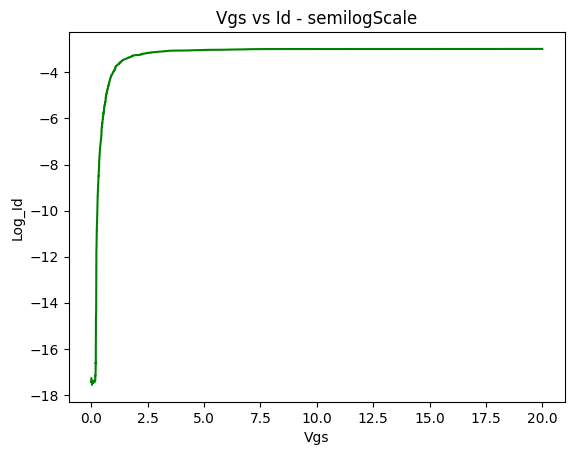

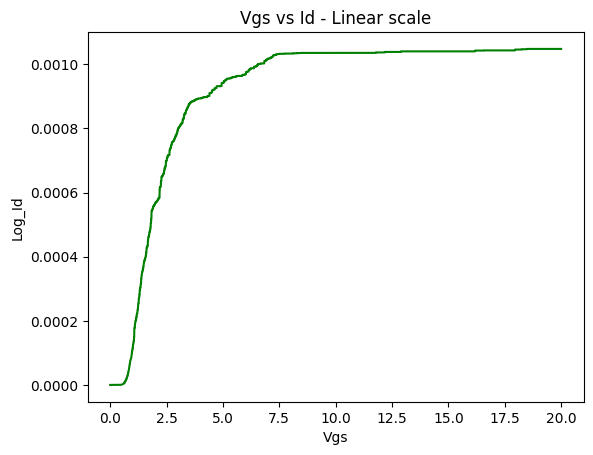

In [6]:
# selecting the parameters 
Tox = 2.5 
Ns = 1e20
Nc = 1e17
Nd = 5e18
Vds = 0.5 
Vgs = np.linspace(0, 20, 20000)

Tox = np.repeat(Tox, 20000)
Ns = np.repeat(1e20, 20000)
Nc = np.repeat(1e17, 20000)
Nd = np.repeat(5e18, 20000)
Vds = np.repeat(0.5, 20000)

x_test = np.column_stack((Tox, Nc, Nd, Ns, Vds, Vgs))
x_test = pd.DataFrame(x_test, columns=['Tox','Nc', 'Nd', 'Ns', 'Vds', 'Vgs'])

x_test_transformed = poly.transform(x_test)
x_test_scaled = scaler.transform(x_test_transformed)

y_pred = model.predict(x_test_scaled)

plt.title("Vgs vs Id - semilogScale")
plt.plot(Vgs, y_pred, "green")
plt.xlabel("Vgs")
plt.ylabel('Log_Id')
plt.show()

plt.figure()
plt.plot(Vgs, np.maximum(np.power(10, y_pred), 1e-18), "green")
plt.title("Vgs vs Id - Linear scale")
plt.ylabel('Log_Id')
plt.xlabel("Vgs")
plt.show()

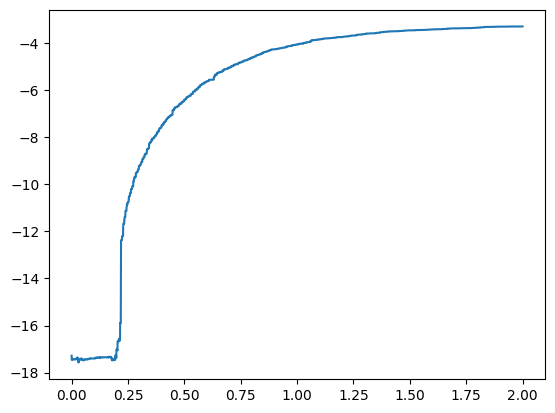

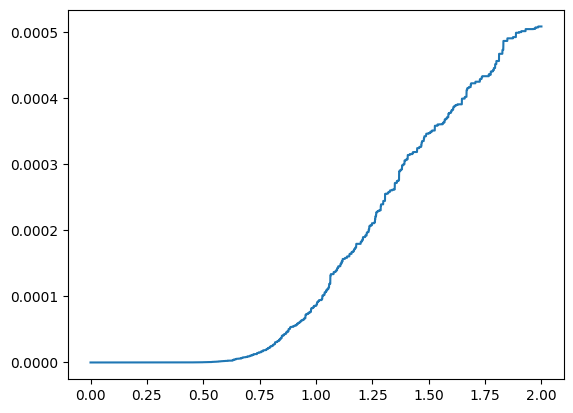

In [7]:
# testiing with the other datas 
Tox_2 = np.repeat(3, 20000)
Ns_2 = np.repeat(1e20, 20000)
Nc_2 = np.repeat(1e17, 20000)
Nd_2 = np.repeat(5e18, 20000)
Vds_2 = np.repeat(0.5, 20000)
Vgs_2 = np.linspace(0, 2, 20000)

x_test_2 = np.column_stack((Tox_2, Nc_2, Nd_2, Ns_2, Vds_2, Vgs_2))
x_test_2 = pd.DataFrame(x_test_2, columns=['Tox','Nc', 'Nd', 'Ns', 'Vds', 'Vgs'])

x_test_2_transformed = poly.transform(x_test_2)
x_test_2_scaled = scaler.transform(x_test_2_transformed)

y_pred_2 = model.predict(x_test_2_scaled)

plt.plot(Vgs_2, y_pred_2)
plt.show()

plt.figure()
plt.plot(Vgs_2, np.maximum(np.power(10, y_pred_2), 1e-18))

In [8]:
test_2 = df_test.iloc[406:608]

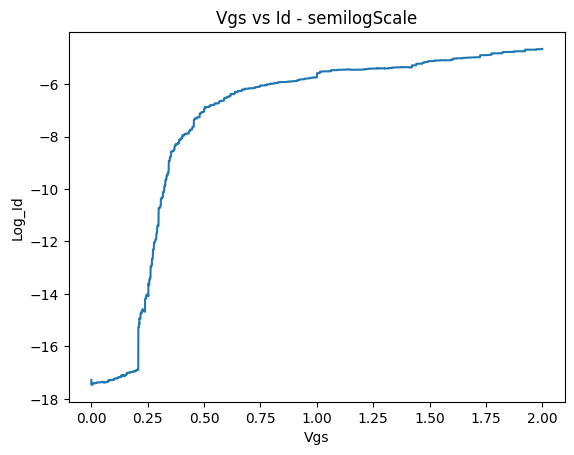

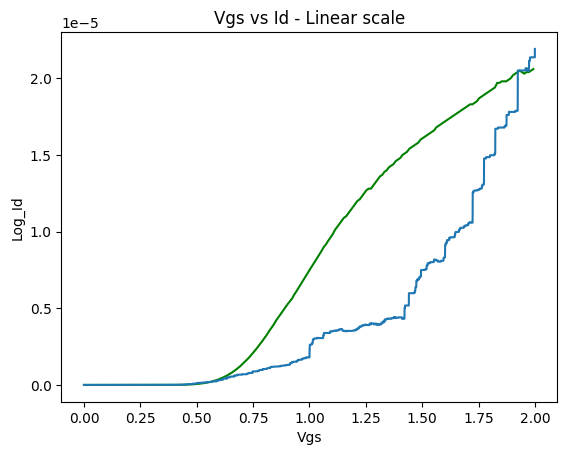

In [19]:
#test datas 
vgs_test_2 = test_2["Vgs"]
Id_test_2 = test_2["Id"]


# testiing with the other datas 
Tox_3 = np.repeat(1.5, 20000)
Ns_3 = np.repeat(2e+19, 20000)
Nc_3 = np.repeat(1e17, 20000)
Nd_3 = np.repeat(2e18, 20000)
Vds_3 = np.repeat(0.5, 20000)
Vgs_3 = np.linspace(0, 2, 20000)

x_test_3 = np.column_stack((Tox_3, Nc_3, Nd_3, Ns_3, Vds_3, Vgs_3))
x_test_3 = pd.DataFrame(x_test_3, columns=['Tox','Nc', 'Nd', 'Ns', 'Vds', 'Vgs'])

x_test_3_transformed = poly.transform(x_test_3)
x_test_3_scaled = scaler.transform(x_test_3_transformed)

y_pred_3 = model.predict(x_test_3_scaled)

plt.plot(Vgs_3, y_pred_3)
plt.title("Vgs vs Id - semilogScale")
plt.xlabel("Vgs")
plt.ylabel('Log_Id')
plt.show()

plt.figure()
plt.title("Vgs vs Id - Linear scale")
plt.ylabel('Log_Id')
plt.xlabel("Vgs")
plt.plot(vgs_test_2, Id_test_2, color = "green")
plt.plot(Vgs_3, np.maximum(np.power(10, y_pred_3), 1e-18))
plt.show()